# DCS 630 Predictive Analytics 
## Bellevue University
## 3.2 Assignment: Using Data to Improve MLB Attendance
## Author: Gyan Kannur
## Date: 09/18/2025

## Assignment Instructions:
In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.
You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all of your code and to document your steps, process, and analysis.

### Business Understanding

Scope: The intent for this analysis is to provide useful insights for improving attendance at the Los Angeles Dodgers Major League Baseball (MLB) home games. The dodgers-2022.csv will be utilized to complete the analysis. At a high-level, the steps taken for this analysis will be Data Understanding (Dataset Overview, Univariate Analysis, Multivariate Analysis), Data Preparation, Predictive Modeling, Model Evaluation, and Deployment Recommendation. Some of the technical questions to answer for the analysis are outlined below: <br>
<ul>
    <li> What does the attendance distribution look like within this dataset?
    <li> How balanced are the categorical features within this dataset?
    <li> Are any features highly correlated with attendance?
    <li> Which predictive model will be used to predict attendance based on features within this dataset?
    <li> What are the evaluation metrics the predictive model?
    <li> Is the model ready for deployment?
<ul>

In [1]:
'''
Import the necessary libraries to complete Exercise 3.2.
'''
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)
print('sklearn:', sklearn.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.9.1
sklearn: 1.5.2


### Data Understanding - Dataset Overview

In [3]:
'''
Import the dataset.
Note: A copy of the CSV file was placed into the same directory as this notebook.
Utilize pd.read_csv() to read the file as a pandas data frame.
'''
df = pd.read_csv('./assignment-datasets/dodgers-2022.csv')

In [4]:
'''
Use head() function to display the first 10 rows of data of df.
'''
df.head(10)

month  day  attend day_of_week   opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday    Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday    Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday    Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday     Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday     Padres    57  Cloudy     Night  NO    NO   
5   APR   15   38359      Sunday     Padres    65  Clear        Day  NO    NO   
6   APR   23   26376      Monday     Braves    60  Cloudy     Night  NO    NO   
7   APR   24   44014     Tuesday     Braves    63  Cloudy     Night  NO    NO   
8   APR   25   26345   Wednesday     Braves    64  Cloudy     Night  NO    NO   
9   APR   27   44807      Friday  Nationals    66  Clear      Night  NO    NO   

  fireworks bobblehead  
0        NO         NO  
1        NO         NO  
2        NO         NO  
3       YES         NO  
4        NO         NO  
5        NO         NO  
6        NO         NO  
7        NO         NO  
8        NO         NO  
9       YES         NO

In [5]:
'''
Understand the shape of the dataset.
'''
print('There are {} rows and {} columns in this dataset.'.format(df.shape[0], df.shape[1]))

There are 81 rows and 12 columns in this dataset.


In [6]:
'''
Display the total size of this dataset.
'''
print('This dataset contains {} records.'.format(df.size))

This dataset contains 972 records.


In [7]:
'''
Find the type of data within each column initially.
'''
df.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

In [8]:
'''
Understand if there are any missing values in the dataset.
'''
df.isna().sum().sort_values(ascending = False)

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

In [9]:
'''
Understand how many missing values are in the dataset initially.
'''
df.isna().sum().sum()

0

In [10]:
'''
Understand how many unique values are within each feature.
'''
df.nunique()

month           7
day            31
attend         80
day_of_week     7
opponent       17
temp           32
skies           2
day_night       2
cap             2
shirt           2
fireworks       2
bobblehead      2
dtype: int64

In [11]:
'''
Summarize the findings above with info().
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


### Observations for Dataset Summary: 
<ul>
    <li> There are 12 features and 81 records available in this dataset.
    <li> Features considered in the dataset are month, day, attendance, day of the week, opponent, tempearature, sky condition, day or night game, hat provided, shirt provided, firework show, or bobbleheads provided.
    <li> Target variable will be attendance (numeric).
    <li> There are 9 categorical variables and 3 numeric variables to start. I'll treat the day of the month as categorical later in the analysis which will result in 10 categorical and 2 numeric variables (temperature and attendance).
    <li> There appear to be no missing values within the dataset. This will need to be verified during the Exploratory Data Analysis (EDA) steps.
<ul>

### Data Understanding - Univariate Analysis

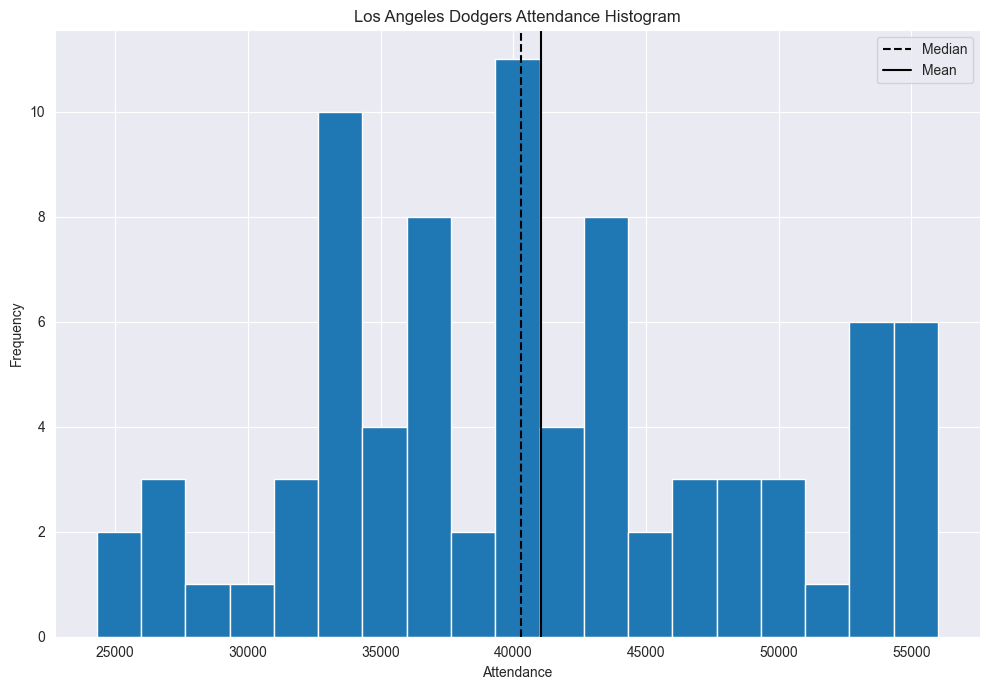

In [12]:
'''
Understand the target variable 'attendance' distribution.
Use plt.hist() to create the histogram.
'''
# Specify number of bins and calculate mean and standard deviation for best fit line.
bin_number = 19
mu_attend = df['attend'].mean()
standard_dev_attend = df['attend'].std()

# Generate the histogram of the data.
fig, ax = plt.subplots(1, 1, figsize=(10,7), tight_layout = True)
n, bins, patches = plt.hist(df['attend'], bin_number, rwidth = 1.00)
plt.axvline(df['attend'].median(), color='k', linestyle='--', label ='Median')
plt.axvline(df['attend'].mean(), color='k', linestyle='-', label ='Mean')
plt.title('Los Angeles Dodgers Attendance Histogram')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


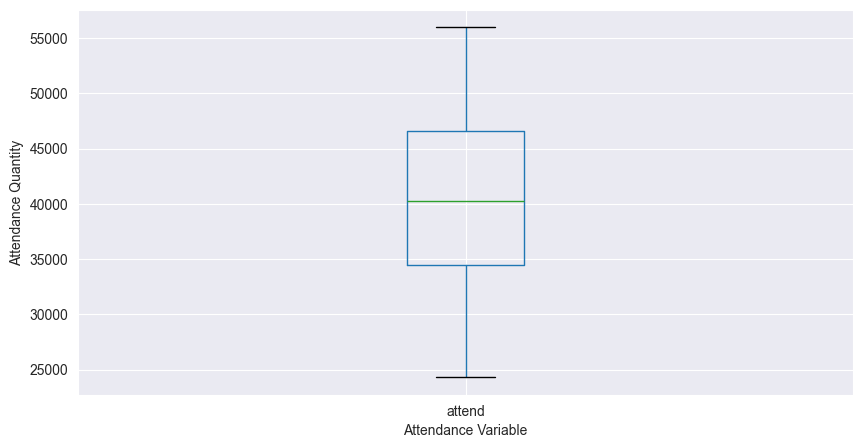

In [13]:
'''
Construct a box plot to understand attendance with a different plot.
'''
df.boxplot(column='attend', figsize=(10,5))
plt.xlabel("Attendance Variable", fontsize=10)
plt.ylabel("Attendance Quantity", fontsize=10)
plt.show()

In [14]:
'''
Use describe() to understand the target variable descriptive statistics.
'''
round(df['attend'].describe(), 2)

count       81.00
mean     41040.07
std       8297.54
min      24312.00
25%      34493.00
50%      40284.00
75%      46588.00
max      56000.00
Name: attend, dtype: float64

Attendance Distribution Observations: <br>
<ul>
    <li> Mean attendance (41,040.07) is slightly above the median attendance (40,284.00).
    <li> Range is 31,688.00 with a maximum attendance of 56,000.00 and minimum attendance of 24,3127.00.
    <li> Interquartile range is 12,095.00 with a 75% Quartile of 46,588.00 and 25% of 34,493.00.
    <li> There are no obvious outliers that stick out at this point in the analysis.
    <li> The distribution appears to be close to normal with a slight bimodal spike near the right tail.
<ul>

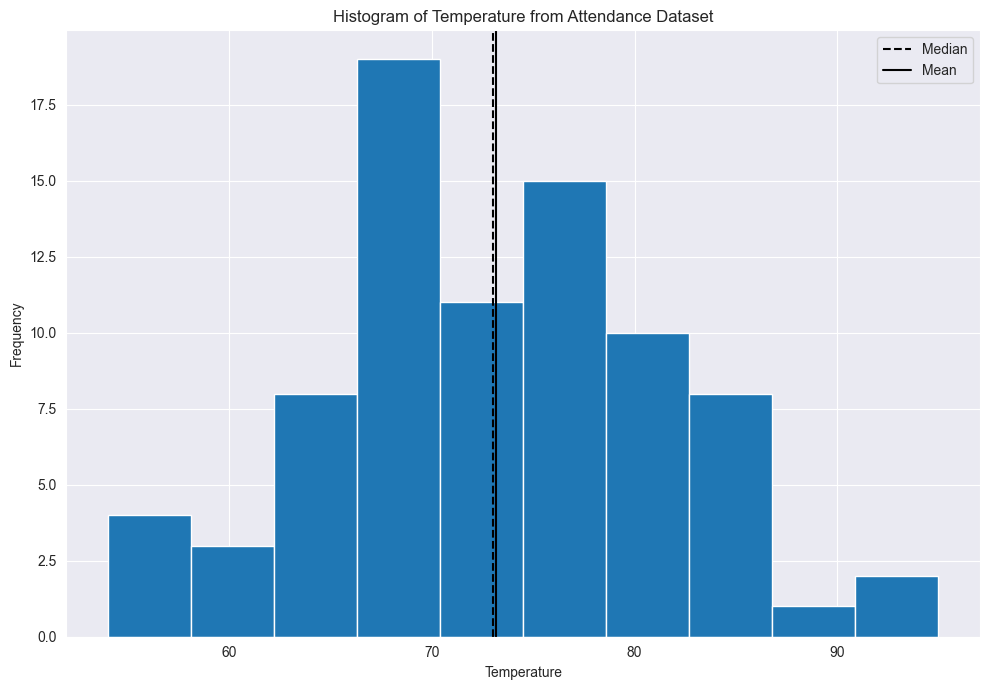

In [15]:
'''
Understand the target variable 'temp' distribution.
Use plt.hist() to create the histogram.
'''
# Specify number of bins and calculate mean and standard deviation for best fit line.
bin_number = 10
mu_temp = df['temp'].mean()
standard_dev_temp = df['temp'].std()

# Generate the histogram of the data.
fig, ax = plt.subplots(1, 1, figsize=(10,7), tight_layout = True)
n, bins, patches = plt.hist(df['temp'], bin_number, rwidth = 1.00)
plt.axvline(df['temp'].median(), color='k', linestyle='--', label ='Median')
plt.axvline(df['temp'].mean(), color='k', linestyle='-', label ='Mean')
plt.title('Histogram of Temperature from Attendance Dataset')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

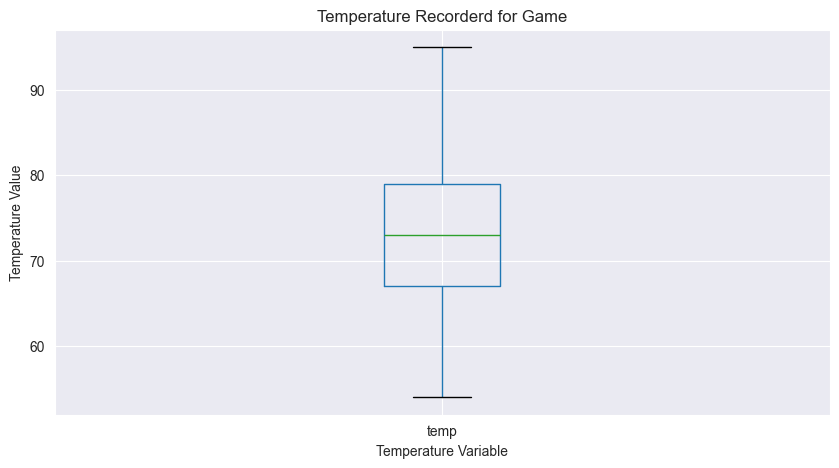

In [16]:
'''
Construct a box plot to understand day with a different plot.
'''
df.boxplot(column='temp', figsize=(10,5))
plt.xlabel("Temperature Variable", fontsize=10)
plt.ylabel("Temperature Value", fontsize=10)
plt.title("Temperature Recorderd for Game")
plt.show()

In [17]:
'''
Use describe() to understand the temperature variable descriptive statistics.
'''
round(df['temp'].describe(), 2)

count    81.00
mean     73.15
std       8.32
min      54.00
25%      67.00
50%      73.00
75%      79.00
max      95.00
Name: temp, dtype: float64

Temperature Distribution Observations: <br>
<ul>
    <li> Mean temperature (73.15) is slightly above the median temperature (73.00).
    <li> Range is 41 degrees with a maximum temperature of 95 degrees and minimum temperature of 54 degrees.
    <li> Interquartile range is 12 degrees with a 75% Quartile of 79 and 25% of 67 degrees. 
    <li> Distribution appears to be normal.
<ul>

In [18]:
'''
Perform a little data preparation prior to moving forward with the categorical variables.
Convert the 'day' variable to categorical in df.
'''
df['day'] = df.day.astype('category')

In [19]:
'''
Verify the datatype was converted for 'day' with info().
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   month        81 non-null     object  
 1   day          81 non-null     category
 2   attend       81 non-null     int64   
 3   day_of_week  81 non-null     object  
 4   opponent     81 non-null     object  
 5   temp         81 non-null     int64   
 6   skies        81 non-null     object  
 7   day_night    81 non-null     object  
 8   cap          81 non-null     object  
 9   shirt        81 non-null     object  
 10  fireworks    81 non-null     object  
 11  bobblehead   81 non-null     object  
dtypes: category(1), int64(2), object(9)
memory usage: 8.5+ KB


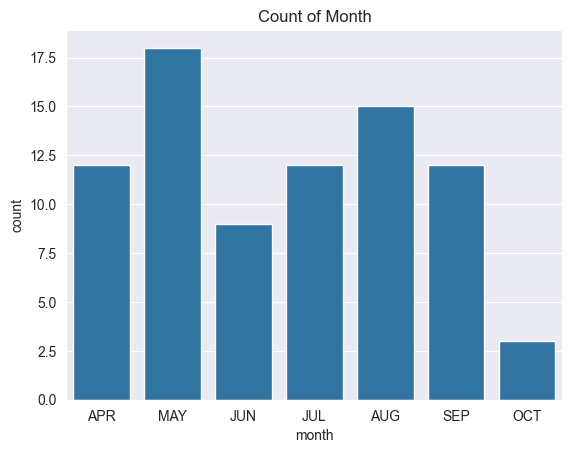

In [20]:
'''
Understand the balance of the 'month' variable with a countplot.
This will show the number of games played for each month.
'''
sns.countplot(x='month', data = df).set(title = 'Count of Month')
plt.show()

In [21]:
'''
Show the values present for count of games in each months.
'''
df['month'].value_counts(normalize = False, sort = True, ascending = False)

month
MAY    18
AUG    15
APR    12
JUL    12
SEP    12
JUN     9
OCT     3
Name: count, dtype: int64

Month Countplot Observations: <br>
<ul>
    <li> The dataset considers games from April, May, June, July, August, September, and a portion of October.
    <li> Most games were played in May.
    <li> Least games were played in October. The season may have ended or the data may have stopped being collected.
    <li> Decent balance across the games played in each month with the exception of October.
<ul>

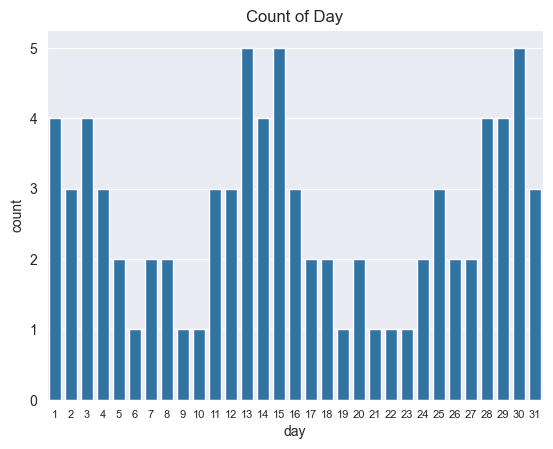

In [22]:
'''
Understand the balance of the 'day' variable with a countplot.
'''
sns.countplot(x='day', data = df).set(title = 'Count of Day')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=10)
plt.show()

In [23]:
'''
Show the values present for count of days.
'''
df['day'].value_counts(normalize = False, sort = True, ascending = False)

day
30    5
15    5
13    5
1     4
3     4
29    4
28    4
14    4
12    3
25    3
2     3
16    3
11    3
4     3
31    3
8     2
17    2
18    2
20    2
24    2
7     2
26    2
27    2
5     2
19    1
21    1
10    1
23    1
6     1
9     1
22    1
Name: count, dtype: int64

Days Countplot Observations: <br>
<ul>
    <li> Games were played on all days from 1-31 across the months (April-October) in the dataset.
    <li> Several days only had 1 or 2 games played.
    <li> Most games were played on the 30th, 15th, or 13th of each month with a quantity of 5 games.
    <li> Based on the visualization, it is evident most games are played in the beginning, middle and end of the months.
<ul>

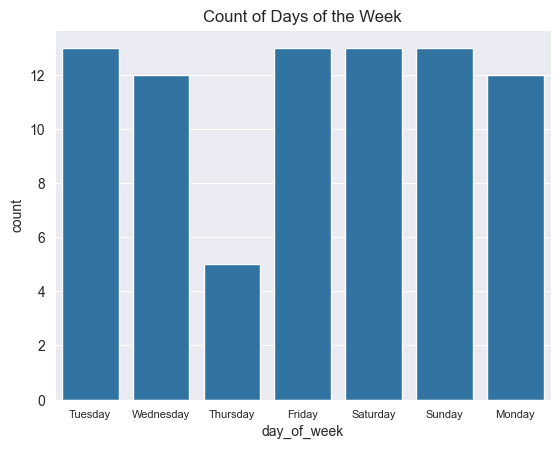

In [24]:
'''
Understand the balance of the 'days of the week' variable with a countplot.
'''
sns.countplot(x='day_of_week', data = df).set(title = 'Count of Days of the Week')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=10)
plt.show()

In [25]:
'''
Show the values present for count of days of the week.
'''
df['day_of_week'].value_counts(normalize = False, sort = True, ascending = False)

day_of_week
Tuesday      13
Friday       13
Saturday     13
Sunday       13
Wednesday    12
Monday       12
Thursday      5
Name: count, dtype: int64

Days of Week Countplot Observations: <br>
<ul>
    <li> There were 13 games played on each of the following days: Tuesdays, Fridays, Saturdays, and Sundays.
    <li> There were only 5 games played on Thursdays.
    <li> There were 12 games played on Wednesdays and Mondays.
<ul>

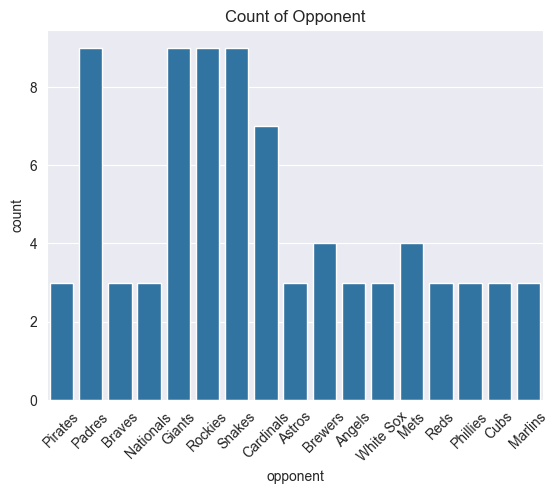

In [26]:
'''
Understand the balance of the 'opponent' variable with a countplot.
'''
sns.countplot(x='opponent', data = df).set(title = 'Count of Opponent')
plt.xticks(fontsize = 10, rotation = 45) 
plt.yticks(fontsize=10)
plt.show()

In [27]:
'''
Show the values present for count of Opponent.
'''
df['opponent'].value_counts(normalize = False, sort = True, ascending = False)

opponent
Giants       9
Rockies      9
Snakes       9
Padres       9
Cardinals    7
Mets         4
Brewers      4
Pirates      3
Cubs         3
Phillies     3
Reds         3
Astros       3
White Sox    3
Angels       3
Nationals    3
Braves       3
Marlins      3
Name: count, dtype: int64

Opponent Countplot Observations: <br>
<ul>
    <li> Most games were played against the Giants, Rockies, Snakes (assuming Diamondbacks), and Padres with 9 games each.
    <li> Several opponents only faced the Dodgers 3 times in the timeframe of the data collection.
<ul>

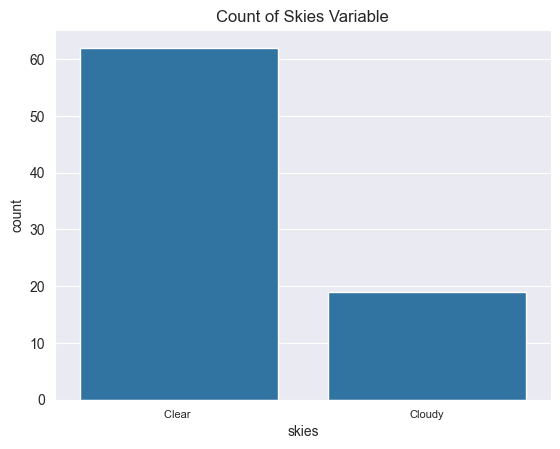

In [28]:
'''
Understand the balance of the 'skies' variable with a countplot.
'''
sns.countplot(x='skies', data = df).set(title = 'Count of Skies Variable')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=10)
plt.show()

In [29]:
'''
Show the values present for count of sky conditions.
'''
df['skies'].value_counts(normalize = False, sort = True, ascending = False)

skies
Clear     62
Cloudy    19
Name: count, dtype: int64

Sky Condition Countplot Observations: <br>
<ul>
    <li> Most games were played with a clear sky (QTY 62).
    <li> There were 19 games played on cloudy days.
<ul>

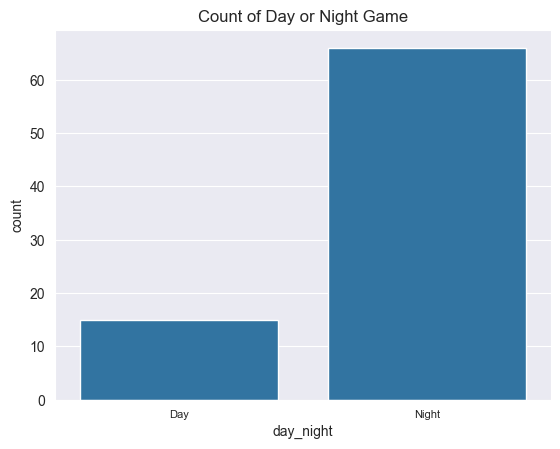

In [30]:
'''
Understand the balance of the 'day_night' variable with a countplot.
'''
sns.countplot(x='day_night', data = df).set(title = 'Count of Day or Night Game')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=10)
plt.show()

In [31]:
'''
Show the values present for count of day or night games.
'''
df['day_night'].value_counts(normalize = False, sort = True, ascending = False)

day_night
Night    66
Day      15
Name: count, dtype: int64

Day our Night Game Countplot Observations: <br>
<ul>
    <li> Most games were played at night (QTY 66 Games)
    <li> There were 15 games played during the day.
<ul>

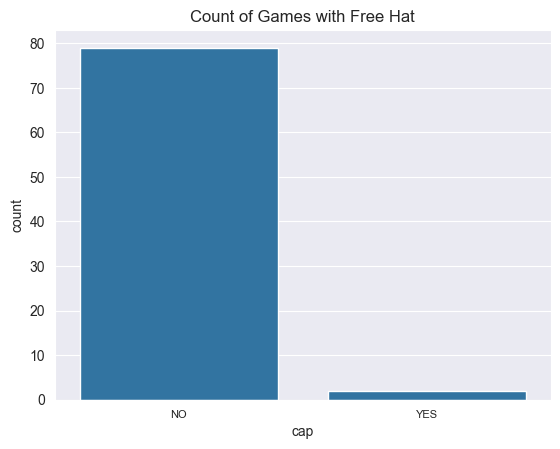

In [32]:
'''
Understand the balance of the 'cap' variable with a countplot.
'''
sns.countplot(x='cap', data = df).set(title = 'Count of Games with Free Hat')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=10)
plt.show()

In [33]:
'''
Show the values present for count of games with a free hat.
'''
df['cap'].value_counts(normalize = False, sort = True, ascending = False)

cap
NO     79
YES     2
Name: count, dtype: int64

Games with Free Hat Countplot Observations: <br>
<ul>
    <li> There were only 2 of the 81 games where hats were provided.
<ul>

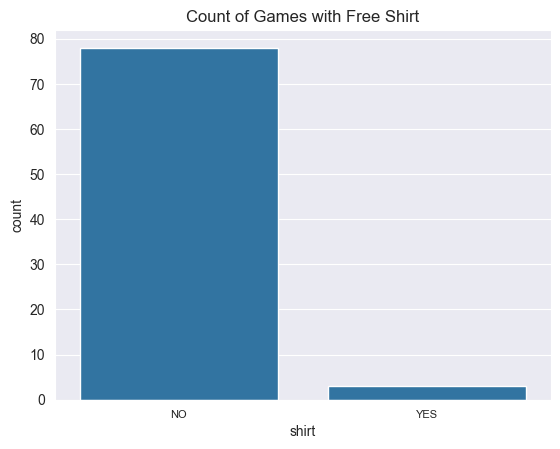

In [34]:
'''
Understand the balance of the 'shirt' variable with a countplot.
'''
sns.countplot(x='shirt', data = df).set(title = 'Count of Games with Free Shirt')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=10)
plt.show()

In [35]:
'''
Show the values present for count of games with a free shirt.
'''
df['shirt'].value_counts(normalize = False, sort = True, ascending = False)

shirt
NO     78
YES     3
Name: count, dtype: int64

Games with a Free Shirt Countplot Observations: <br>
<ul>
    <li> There were only 3 of the 81 games with a free shirt given away.
<ul>

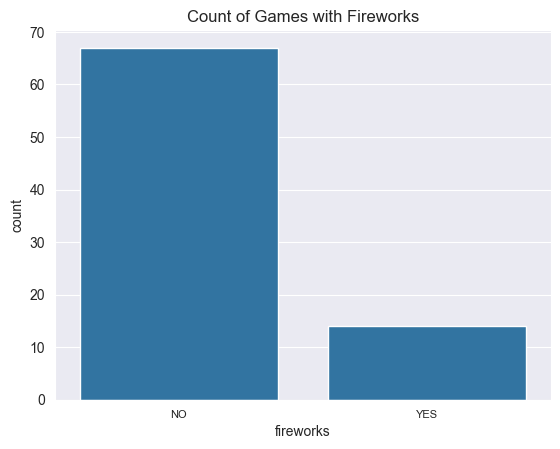

In [36]:
'''
Understand the balance of the 'fireworks' variable with a countplot.
'''
sns.countplot(x='fireworks', data = df).set(title = 'Count of Games with Fireworks')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=10)
plt.show()

In [37]:
'''
Show the values present for count of games with fireworks.
'''
df['fireworks'].value_counts(normalize = False, sort = True, ascending = False)

fireworks
NO     67
YES    14
Name: count, dtype: int64

Games with a Fireworks Countplot Observations: <br>
<ul>
    <li> There were 14 of the 81 games with a fireworks.
<ul>

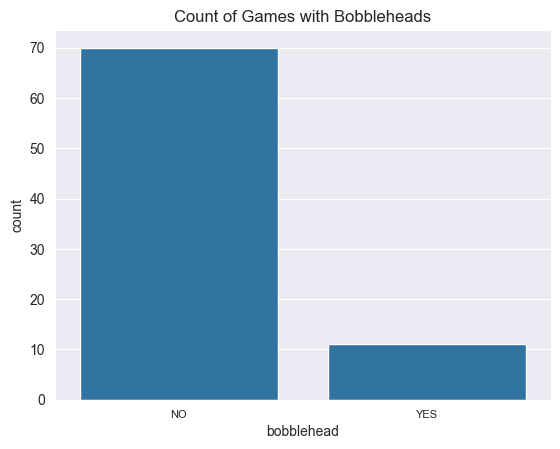

In [38]:
'''
Understand the balance of the 'bobblehead' variable with a countplot.
'''
sns.countplot(x='bobblehead', data = df).set(title = 'Count of Games with Bobbleheads')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=10)
plt.show()

In [39]:
'''
Show the values present for count of games with free bobbleheads.
'''
df['bobblehead'].value_counts(normalize = False, sort = True, ascending = False)

bobblehead
NO     70
YES    11
Name: count, dtype: int64

Games with a Free Bobblehead Countplot Observations: <br>
<ul>
    <li> There were 11 of the 81 games with a bobblehead given away.
<ul>

### Data Understanding - Multivariate Analysis

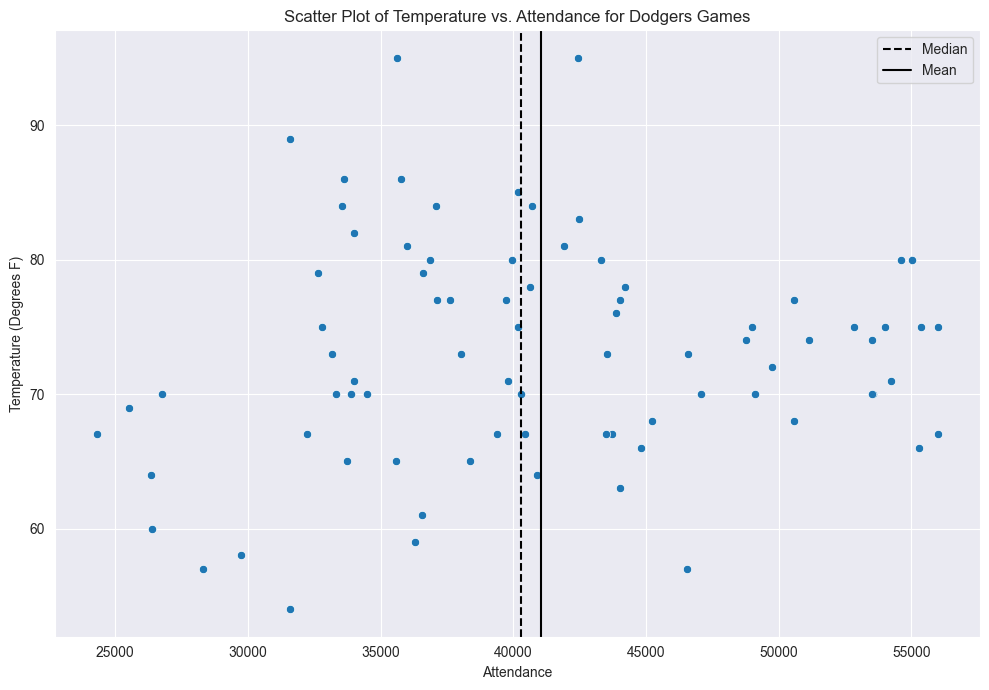

In [40]:
'''
Plot the attendance vs temperature on a scatter plot.
'''
fig, ax = plt.subplots(1, 1, figsize=(10,7), tight_layout = True)
sns.scatterplot(x='attend', y='temp', data=df)
plt.axvline(df['attend'].median(), color='k', linestyle='--', label ='Median')
plt.axvline(df['attend'].mean(), color='k', linestyle='-', label ='Mean')
plt.xlabel('Attendance')
plt.ylabel('Temperature (Degrees F)')
plt.title('Scatter Plot of Temperature vs. Attendance for Dodgers Games')
plt.legend(loc='upper right')
plt.show()

Scatterplot of Temperature vs. Attendance Observations: <br>
<ul>
    <li> Attendance was highest when the temperature was between 65 to 80 degrees.
    <li> The lowest attendance occured when it was colder outside.
    <li> Attendance tended to remain below 45,000 when it was hotter than 80 degrees.
<ul>

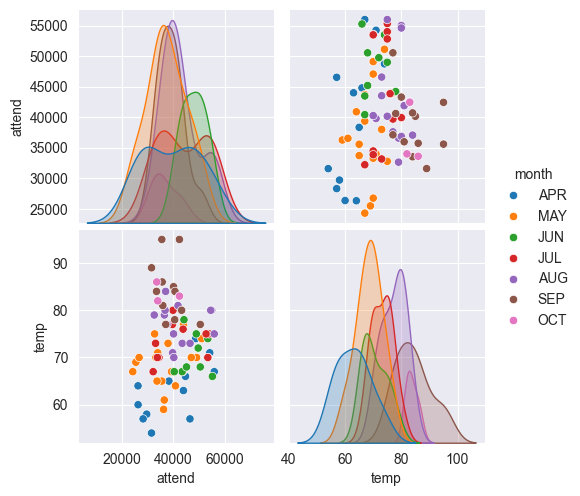

In [41]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by month.
'''
sns.pairplot(df, hue = 'month')
plt.show()

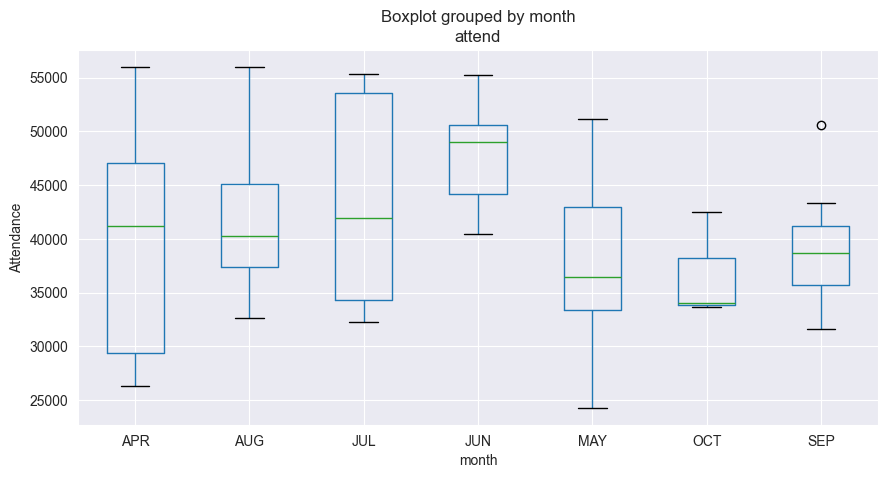

In [42]:
'''
Construct a box plot to understand attendance based on month.
'''
df.boxplot(column='attend', by='month',figsize=(10,5))
plt.xlabel("month", fontsize=10)
plt.ylabel("Attendance", fontsize=10)
plt.show()

In [43]:
'''
Find the sum of attendance for each month shown here.
'''
df.groupby(['month'])['attend'].sum().sort_values(ascending=False)

month
MAY    672223
AUG    641273
JUL    526611
APR    475103
SEP    467461
JUN    431464
OCT    110111
Name: attend, dtype: int64

Pairplot and Boxplot of Month Observations: <br>
<ul>
    <li> Boxplot shows highest median attendance in June.
    <li> The lowest median attendance occured in October.
    <li> May had the highest overall attendance, however there were also 18 games played (most in the timeframe).
    <li> Average for the attendance for each month based on games played: (May - 37,345.72), 
        (August - 42,751.53), (July - 43884.25), (April - 39,591.92), (September - 38,955.08), (June - 47,940.44), 
        (October - 36,703.67). 
    <li> June had the best attendance based on the number of games played throughout the months. It would be good to understand what happened in June to cause the increased attendance.
<ul>

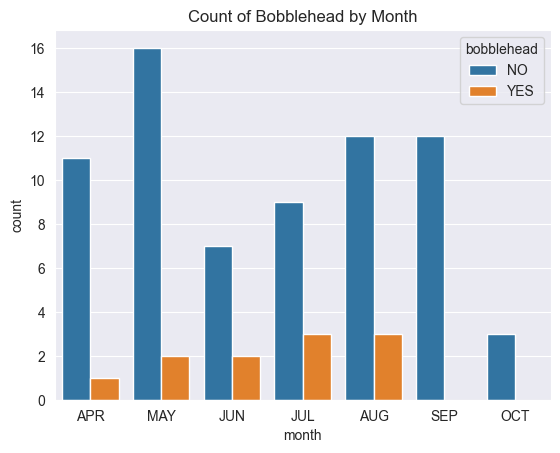

In [44]:
'''
Construct a bivariate countplot for Month and Bobbleheads.
'''
sns.countplot(x = df['month'], hue = df['bobblehead']).set(title = 'Count of Bobblehead by Month')
plt.show()

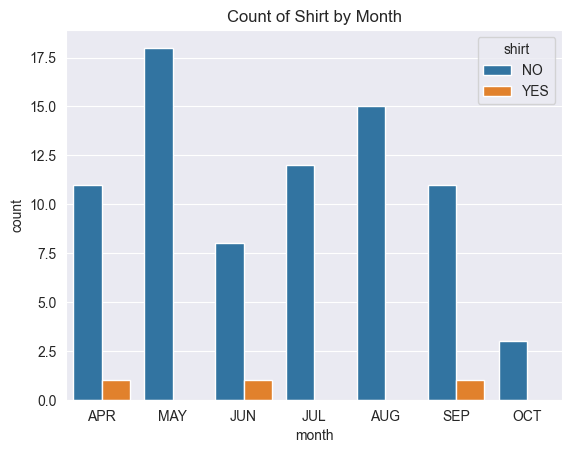

In [45]:
'''
Construct a bivariate countplot for Month and Shirts.
'''
sns.countplot(x = df['month'], hue = df['shirt']).set(title = 'Count of Shirt by Month')
plt.show()

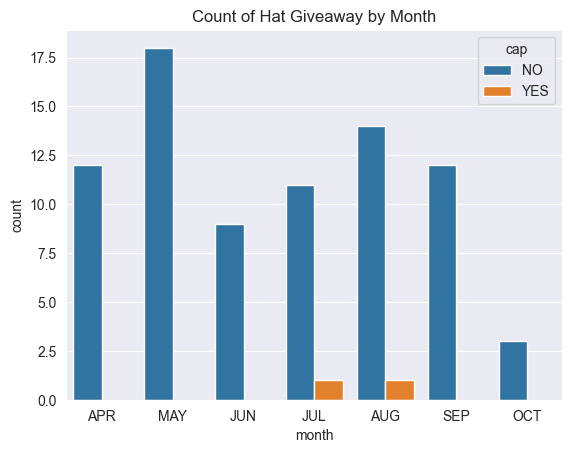

In [46]:
'''
Construct a bivariate countplot for Month and Hat.
'''
sns.countplot(x = df['month'], hue = df['cap']).set(title = 'Count of Hat Giveaway by Month')
plt.show()

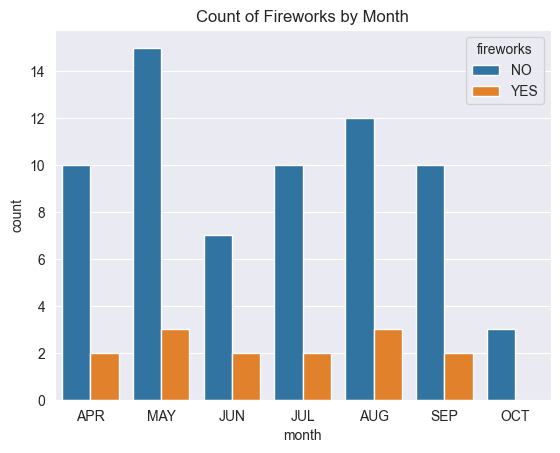

In [47]:
'''
Construct a bivariate countplot for Month and Fireworks.
'''
sns.countplot(x = df['month'], hue = df['fireworks']).set(title = 'Count of Fireworks by Month')
plt.show()

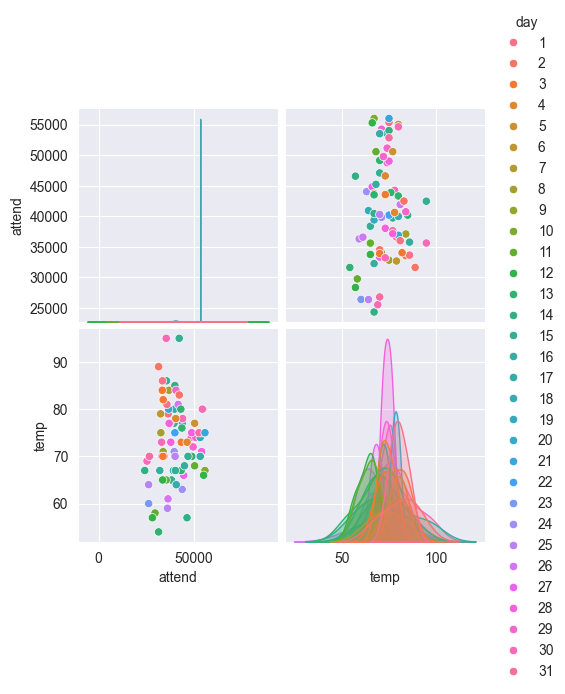

In [48]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by day.
'''
sns.pairplot(df, hue = 'day')
plt.show()

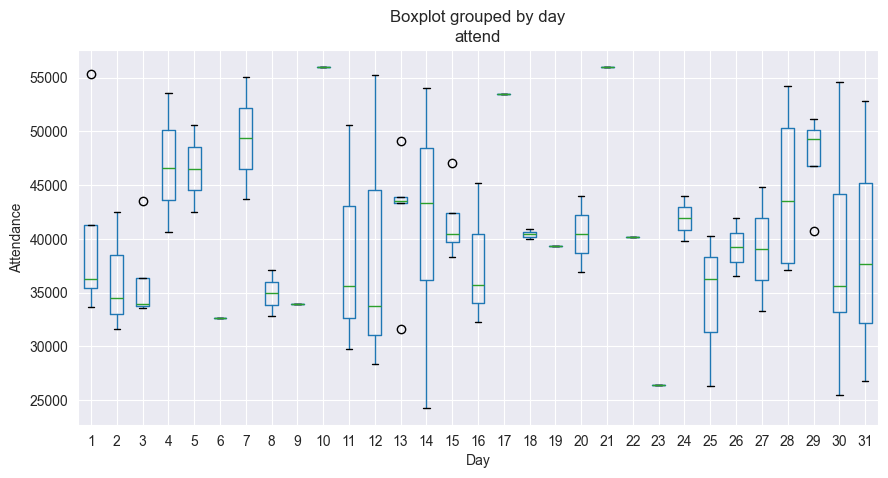

In [49]:
'''
Construct a box plot to understand attendance based on day.
'''
df.boxplot(column='attend', by='day',figsize=(10,5))
plt.xlabel("Day", fontsize=10)
plt.ylabel("Attendance", fontsize=10)
plt.show()

In [50]:
'''
Find the sum of attendance for each day shown here.
'''
df.groupby(['day'])['attend'].sum().sort_values(ascending=False)

C:\Users\gyanr\AppData\Local\Temp\ipykernel_44912\4188195307.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day'])['attend'].sum().sort_values(ascending=False)


day
13    211401
15    208032
30    193134
29    190377
28    178397
14    165042
1     161571
3     144975
4     140777
12    117342
31    117227
11    115879
16    113202
2     108573
17    107002
25    102912
7      98737
5      93055
24     83819
20     80883
18     80861
26     78468
27     78113
8      69883
21     56000
10     56000
22     40173
19     39383
9      33993
6      32659
23     26376
Name: attend, dtype: int64

Pairplot and Boxplot of Day Observations: <br>
<ul>
    <li> Highest attendance was on the 13th, 15th, and 30th. This is likely due to there being 5 games played on these days across April-October.
    <li> Boxplot provides interesting insight for the highest median attendance on the 7th. 
<ul>

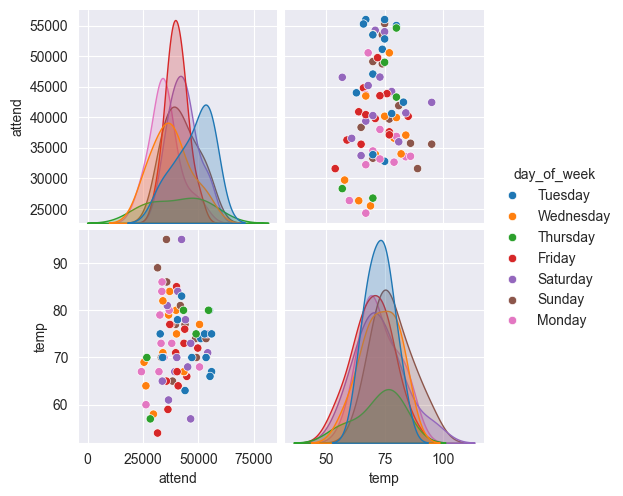

In [51]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by day of the week.
'''
sns.pairplot(df, hue = 'day_of_week')
plt.show()

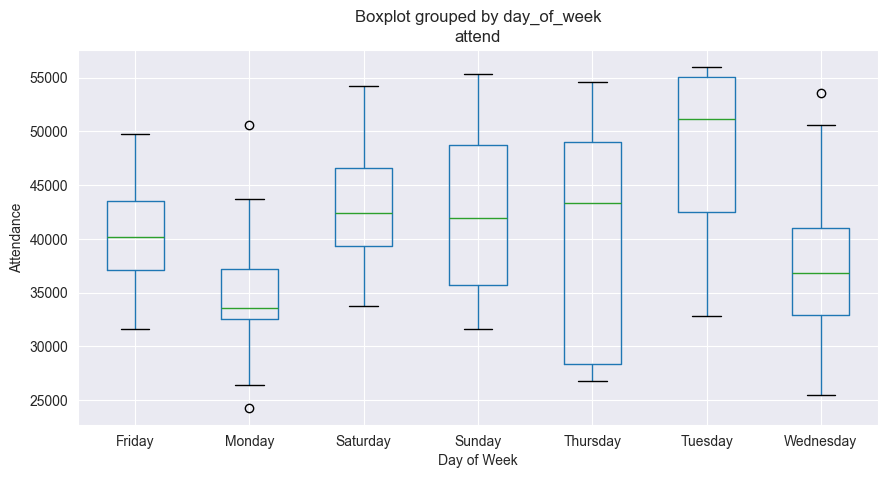

In [52]:
'''
Construct a box plot to understand attendance based on day of week.
'''
df.boxplot(column='attend', by='day_of_week',figsize=(10,5))
plt.xlabel("Day of Week", fontsize=10)
plt.ylabel("Attendance", fontsize=10)
plt.show()

In [53]:
'''
Find the sum of attendance for each day of week shown here.
'''
df.groupby(['day_of_week'])['attend'].sum().sort_values(ascending=False)

day_of_week
Tuesday      620636
Saturday     559948
Sunday       549495
Friday       521520
Wednesday    451022
Monday       419588
Thursday     202037
Name: attend, dtype: int64

Pairplot and Boxplot of Day of Week Observations: <br>
<ul>
    <li> Tuesdays have the highest attendance based on the boxplot distribution.
    <li> Mondays and Wednesdays have the lowest attendance.
    <li> Saturday and Sunday also tend to have high attendance on average.
<ul>

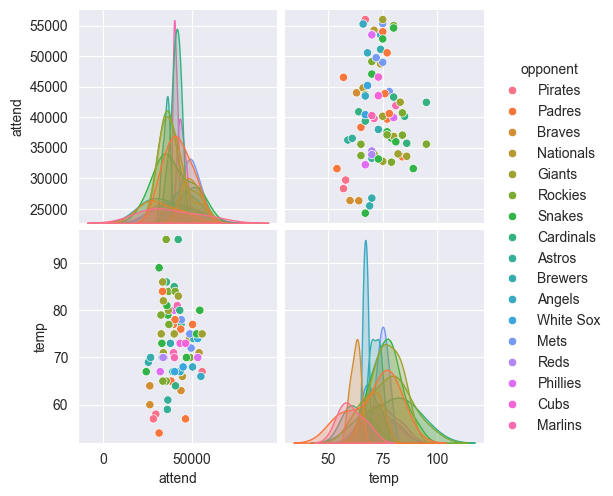

In [54]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by opponent.
'''
sns.pairplot(df, hue = 'opponent')
plt.show()

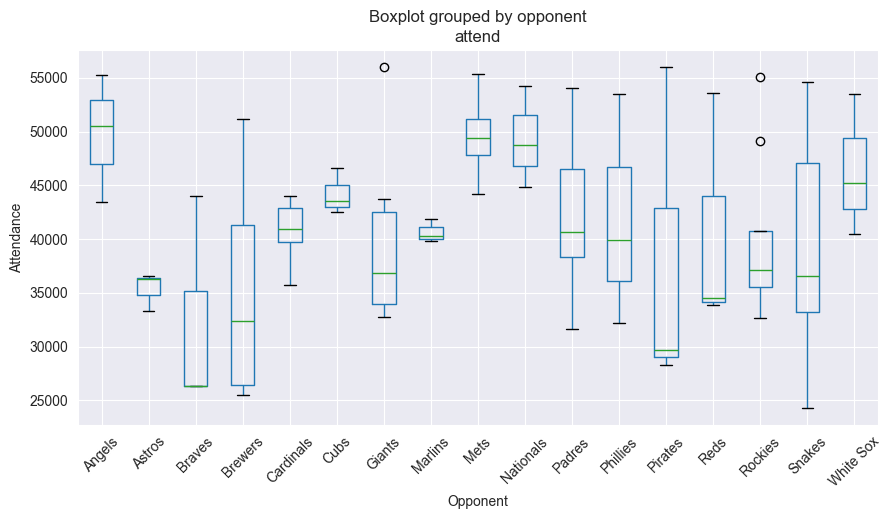

In [55]:
'''
Construct a box plot to understand attendance based on opponent.
'''
df.boxplot(column='attend', by='opponent',figsize=(10,5))
plt.xlabel("Opponent", fontsize=10)
plt.ylabel("Attendance", fontsize=10)
plt.xticks(fontsize = 10, rotation = 45) 
plt.show()

In [56]:
'''
Find the sum of attendance for each opponent shown here.
'''
df.groupby(['opponent'])['attend'].sum().sort_values(ascending = False)

opponent
Padres       378830
Rockies      356681
Snakes       353839
Giants       353667
Cardinals    285973
Mets         198345
Angels       149332
Nationals    147802
Brewers      141435
White Sox    139146
Cubs         132620
Phillies     125691
Marlins      121996
Reds         121947
Pirates      114057
Astros       106150
Braves        96735
Name: attend, dtype: int64

Pairplot and Boxplot of Opponent Observations: <br>
<ul>
    <li> The attendance is highest for the teams in the Dodgers Division (National League West). This is likely due to a higher number of games against those teams. There were 9 games played against the Padres, Giants, Diamondbacks (Snakes), and Rockies.
    <li> The boxplot shows higher attendance for other teams such as the Angels, Mets, and Nationals. 
<ul>

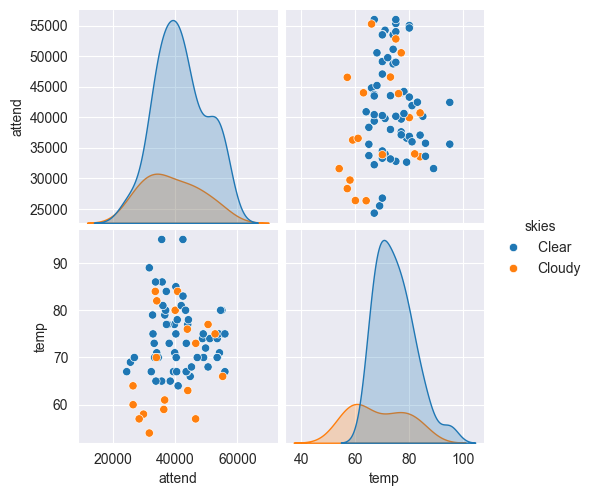

In [57]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by skies.
'''
sns.pairplot(df, hue = 'skies')
plt.show()

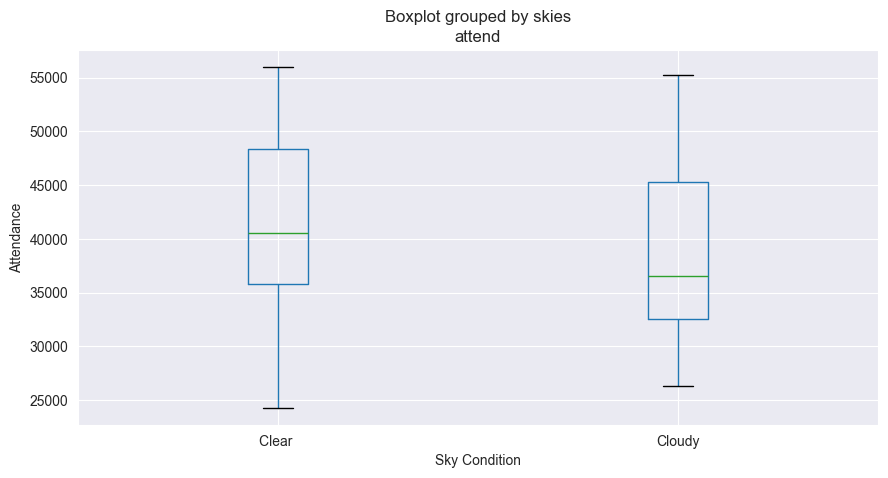

In [58]:
'''
Construct a box plot to understand attendance based on sky condition.
'''
df.boxplot(column='attend', by='skies',figsize=(10,5))
plt.xlabel("Sky Condition", fontsize=10)
plt.ylabel("Attendance", fontsize=10)
plt.show()

In [59]:
'''
Find the sum of attendance for each sky condition shown here.
'''
df.groupby(['skies'])['attend'].sum().sort_values(ascending = False)

skies
Clear     2587211
Cloudy     737035
Name: attend, dtype: int64

Pairplot and Boxplot of Clear or Cloudy Sky Observations: <br>
<ul>
    <li> Attendance tends to be higher on clear days opposed to cloudy days.
    <li> There are more clear days in the dataset, so this must be considered with the first observation listed above.
<ul>

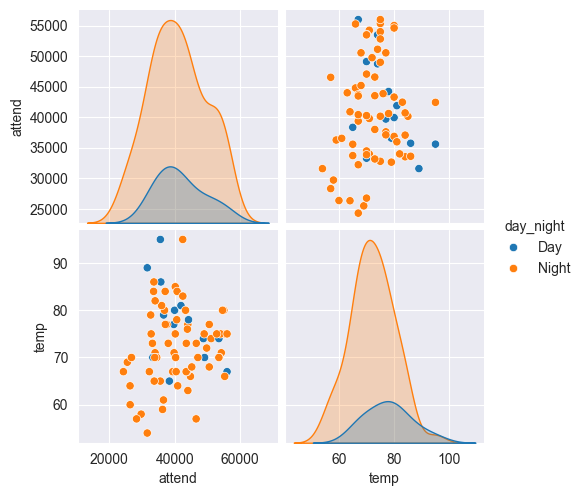

In [60]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by day or night game.
'''
sns.pairplot(df, hue = 'day_night')
plt.show()

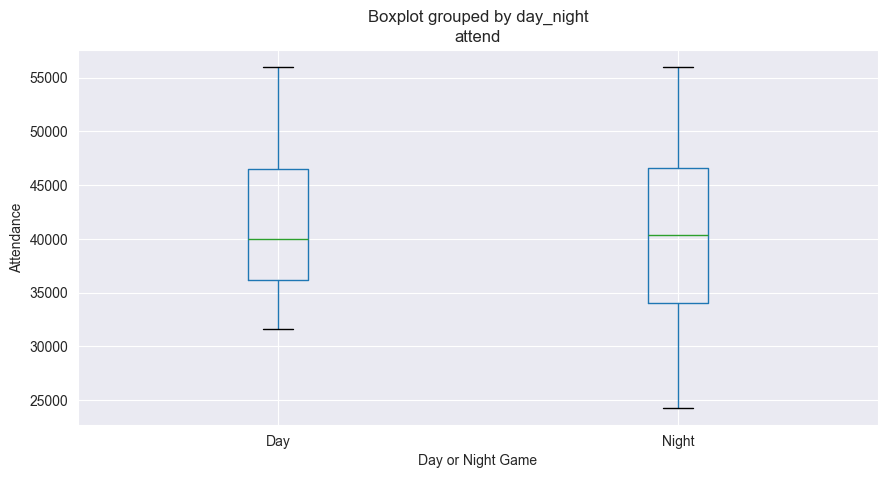

In [61]:
'''
Construct a box plot to understand attendance based on day or night games.
'''
df.boxplot(column='attend', by='day_night',figsize=(10,5))
plt.xlabel("Day or Night Game", fontsize=10)
plt.ylabel("Attendance", fontsize=10)
plt.show()

In [62]:
'''
Find the sum of attendance for each day or night game shown here.
'''
df.groupby(['day_night'])['attend'].sum().sort_values(ascending = False)

day_night
Night    2697347
Day       626899
Name: attend, dtype: int64

Pairplot and Boxplot of Day or Night Game Observations: <br>
<ul>
    <li> There is not much difference in attendance based on day or night games.
    <li> Ther are more night games included in the dataset, so the attendance appears significantly higher for night games.
<ul>

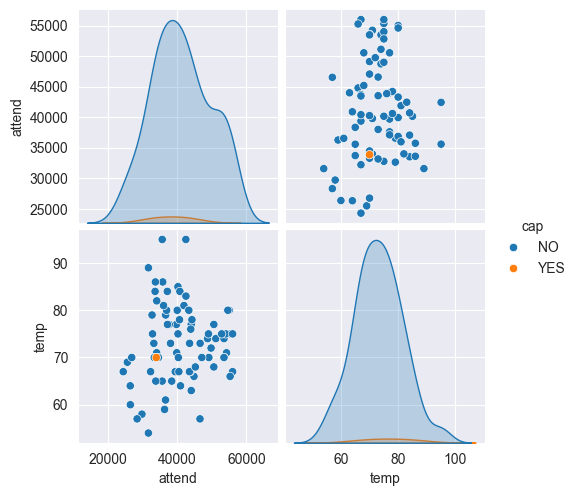

In [63]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by games with a free hat.
'''
sns.pairplot(df, hue = 'cap')
plt.show()

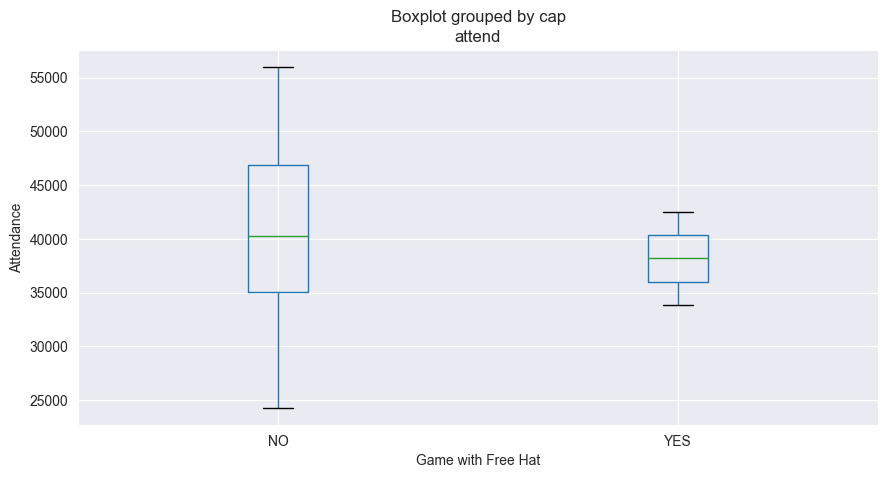

In [64]:
'''
Construct a box plot to understand attendance based on free hats.
'''
df.boxplot(column='attend', by='cap',figsize=(10,5))
plt.xlabel("Game with Free Hat", fontsize=10)
plt.ylabel("Attendance", fontsize=10)
plt.show()

In [65]:
'''
Find the sum of attendance for free hat giveaway games shown here.
'''
df.groupby(['cap'])['attend'].sum().sort_values(ascending = False)

cap
NO     3247867
YES      76379
Name: attend, dtype: int64

Pairplot and Boxplot of Free Hat Observations: <br>
<ul>
    <li> Giving out a free baseball cap did not appear to significantly improve attendance. There were only two games where the free hats were given out though.
<ul>

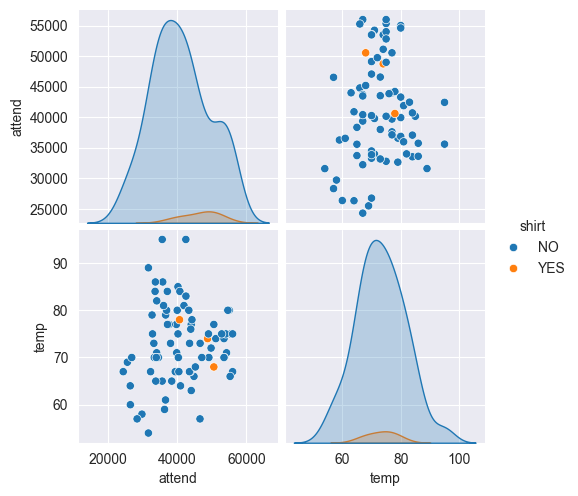

In [66]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by games with a free shirt.
'''
sns.pairplot(df, hue = 'shirt')
plt.show()

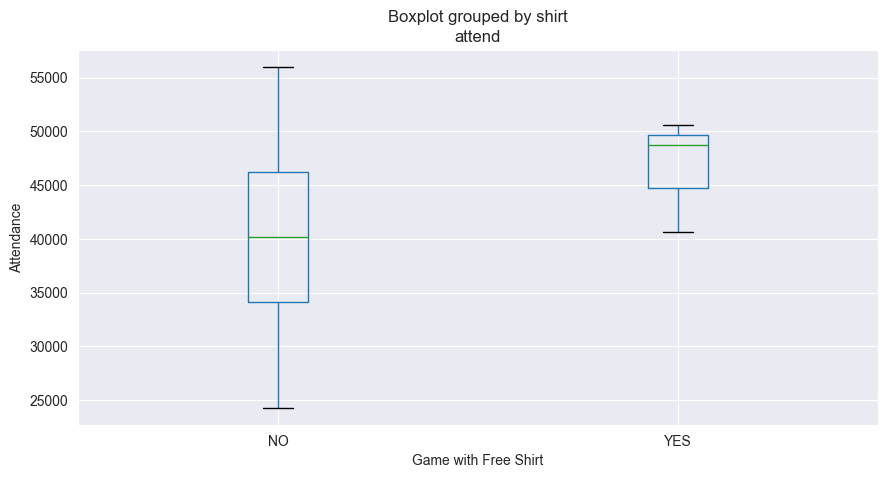

In [67]:
'''
Construct a box plot to understand attendance based on free shirts.
'''
df.boxplot(column='attend', by='shirt',figsize=(10,5))
plt.xlabel("Game with Free Shirt", fontsize=10)
plt.ylabel("Attendance", fontsize=10)
plt.show()

In [68]:
'''
Find the sum of attendance for free shirt giveaway games shown here.
'''
df.groupby(['shirt'])['attend'].sum().sort_values(ascending = False)

shirt
NO     3184315
YES     139931
Name: attend, dtype: int64

Pairplot and Boxplot of Free Shirt Observations: <br>
<ul>
    <li> Giving away a free shirt tended to increase attendance for those games.
<ul>

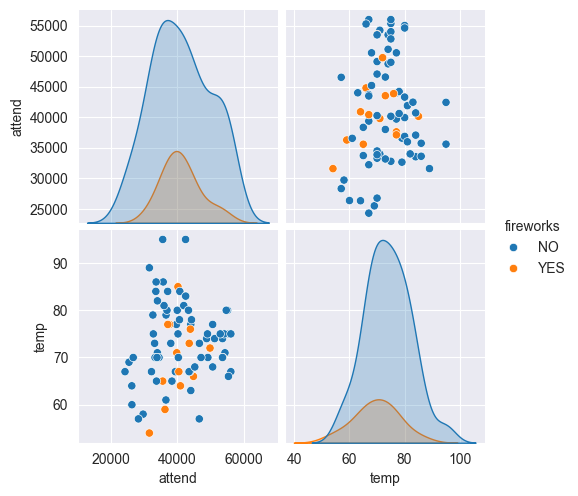

In [69]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by games with fireworks.
'''
sns.pairplot(df, hue = 'fireworks')
plt.show()

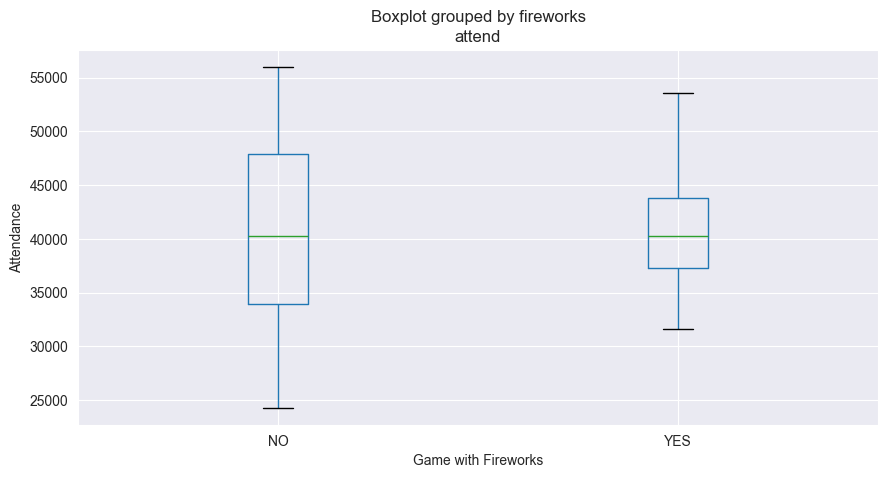

In [70]:
'''
Construct a box plot to understand attendance based on fireworks.
'''
df.boxplot(column='attend', by='fireworks',figsize=(10,5))
plt.xlabel("Game with Fireworks", fontsize=10)
plt.ylabel("Attendance", fontsize=10)
plt.show()

In [71]:
'''
Find the sum of attendance for free firework games shown here.
'''
df.groupby(['fireworks'])['attend'].sum().sort_values(ascending = False)

fireworks
NO     2749156
YES     575090
Name: attend, dtype: int64

Pairplot and Boxplot of Games with Fireworks Observations: <br>
<ul>
    <li> Games with fireworks did not appear to significantly improve attendance.
<ul>

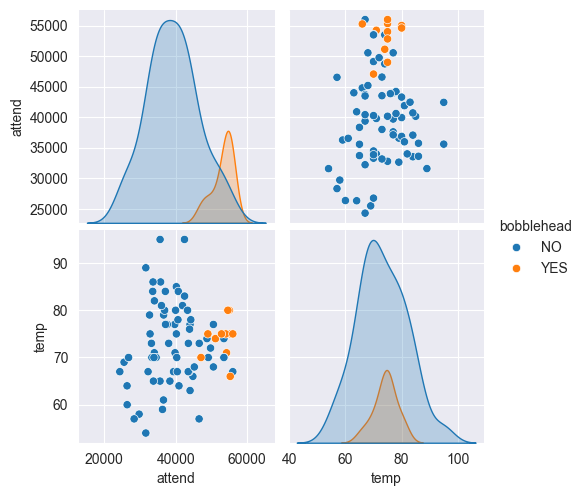

In [72]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by games with a free bobblehead.
'''
sns.pairplot(df, hue = 'bobblehead')
plt.show()

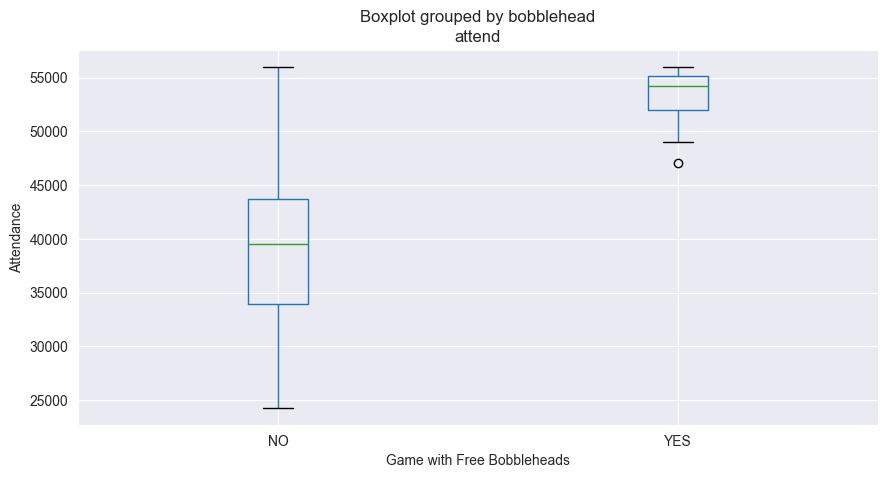

In [73]:
'''
Construct a box plot to understand attendance based on free bobbleheads.
'''
df.boxplot(column='attend', by='bobblehead',figsize=(10,5))
plt.xlabel("Game with Free Bobbleheads", fontsize=10)
plt.ylabel("Attendance", fontsize=10)
plt.show()

In [74]:
'''
Find the sum of attendance for free bobblehead giveaway games shown here.
'''
df.groupby(['bobblehead'])['attend'].sum().sort_values(ascending = False)

bobblehead
NO     2739655
YES     584591
Name: attend, dtype: int64

Pairplot and Boxplot of Free Bobblehead Observations: <br>
<ul>
    <li> Attendance went up drastically for games that included a free bobblehead.
<ul>

### Data Preparation

In [75]:
'''
Perform a little more data preparation by creating dummy variables for the categorical features.
Drop the first column to ensure dummy variable collinearity is avoided.
'''
df = pd.get_dummies(df)

In [76]:
'''
Verify the revised dataframe has the dummy variables included in the column names.
'''
df.columns

Index(['attend', 'temp', 'month_APR', 'month_AUG', 'month_JUL', 'month_JUN',
       'month_MAY', 'month_OCT', 'month_SEP', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'opponent_Angels', 'opponent_Astros',
       'opponent_Braves', 'opponent_Brewers', 'opponent_Cardinals',
       'opponent_Cubs', 'opponent_Giants', 'opponent_Marlins', 'opponent_Mets',
       'opponent_Nationals', 'opponent_Padres', 'opponent_Phillies',
       'opponent_Pirates', 'opponent_Reds', 'opponent_Rockies',
       'opponent_Snakes', 'opponent_White Sox'

In [77]:
'''
Understand the shape of the revised dataset.
'''
print('There are {} rows and {} columns in this dataset.'.format(df.shape[0], df.shape[1]))

There are 81 rows and 76 columns in this dataset.


Text(0.5, 1.0, 'Correlation Heatmap of Attendance Dataset')

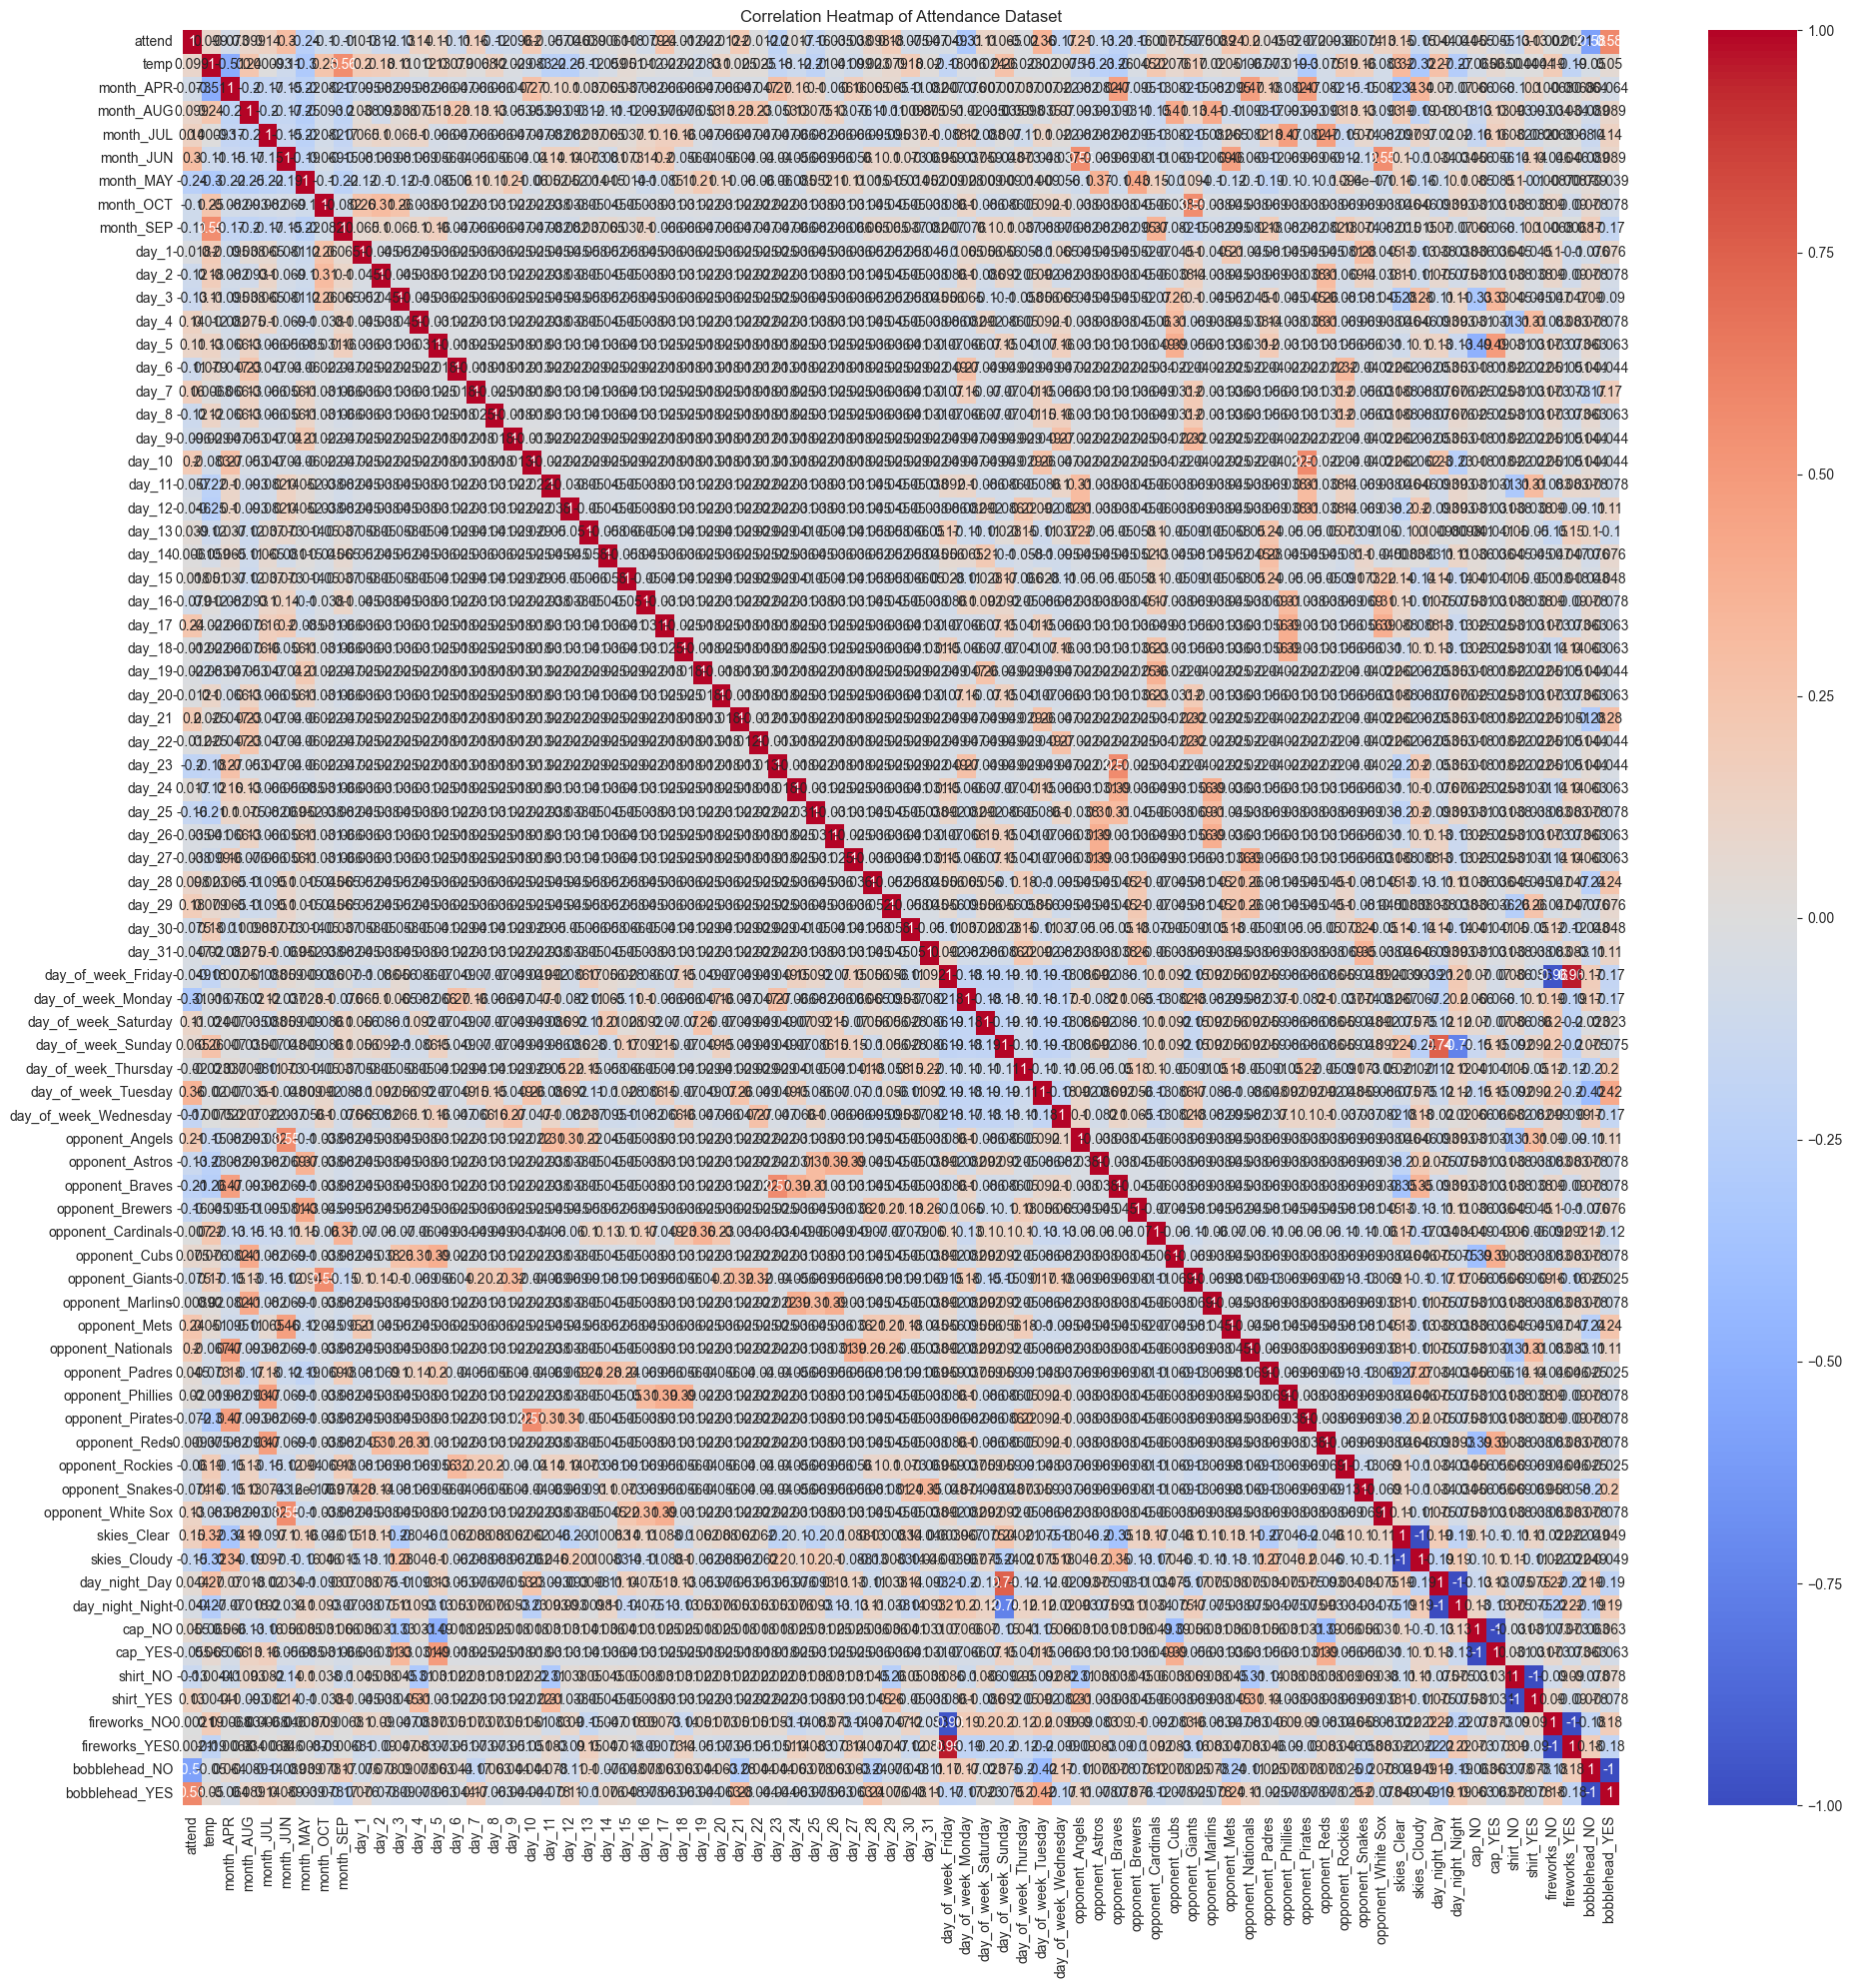

In [78]:
'''
Display a correlation heatmap. Utilize sns.heatmap() to generate the figure.
'''
# Calculate the correlation coefficient with corr().
correlation_number = df.corr()

# Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(20,20), tight_layout = True)
sns.heatmap(correlation_number, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of Attendance Dataset')

This heatmap is too crowded to make any useful insights. The revision of 76 features to consider in this dataset needs to be reduced. First, I'll look to identify the features that are the highest correlation with attendance.

In [79]:
'''
Understand which features are highly positive correlated with attendance.
'''
df.corr().unstack()['attend'].sort_values(ascending = False).drop_duplicates()[0:15]

attend                 1.000000
bobblehead_YES         0.581895
day_of_week_Tuesday    0.355316
month_JUN              0.295853
day_17                 0.240436
opponent_Mets          0.236213
opponent_Angels        0.207796
day_10                 0.202830
day_21                 0.202830
opponent_Nationals     0.195667
day_29                 0.181155
day_7                  0.160699
skies_Clear            0.150963
month_JUL              0.143837
day_4                  0.139975
dtype: float64

In [80]:
'''
Understand which features are highly negatively correlated with attendance.
'''
df.corr().unstack()['attend'].sort_values(ascending = True).drop_duplicates()[0:15]

bobblehead_NO           -0.581895
day_of_week_Monday      -0.307198
month_MAY               -0.239471
opponent_Braves         -0.209171
day_23                  -0.198819
day_of_week_Wednesday   -0.174723
day_25                  -0.160202
opponent_Brewers        -0.157030
skies_Cloudy            -0.150963
opponent_Astros         -0.134533
shirt_NO                -0.133269
day_3                   -0.132569
day_8                   -0.117673
day_2                   -0.115324
day_6                   -0.113633
dtype: float64

In [81]:
'''
Split the data into a training and test set, where the 'attend' column is the target.
'''
X = df.drop('attend', axis = 1)
y = df['attend']

In [82]:
'''
Split the data with train_test_split from sklearn.
Use test_size = 0.2 to split the data into 60% training and 40% testing data.
'''
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [83]:
'''
Print out the shape of the resulting datasets for training and testing.
'''
print("The original data set shape was {} rows and {} columns.".format(df.shape[0],df.shape[1]))
print("The X_train shape is {} rows and {} columns.".format(X_train.shape[0],X_train.shape[1]))
print("The y_train shape is {} rows.".format(y_train.shape[0]))
print("The X_test shape is {} rows and {} columns.".format(X_test.shape[0],X_test.shape[1]))
print("The y_test shape is {} rows.".format(y_test.shape[0]))

The original data set shape was 81 rows and 76 columns.
The X_train shape is 48 rows and 75 columns.
The y_train shape is 48 rows.
The X_test shape is 33 rows and 75 columns.
The y_test shape is 33 rows.


In [84]:
'''
Standardize the X-train and X_test datasets.
'''
'''
Standardize the X_train and X_test datasets.
'''
sc = StandardScaler()
X_train_standardized = sc.fit_transform(X_train)
X_test_standardized = sc.transform(X_test)

In [85]:
'''
Create a PCA that will retain 90% of the variance.
'''
pca = PCA(n_components=0.90, whiten = True)

In [86]:
'''
Conduct PCA on the X_train_standardized datasets.
'''
X_train_pca = pca.fit_transform(X_train_standardized)

In [87]:
'''
Show the reduction in features from the transformed matrix.
'''
print('Original number of features:', X_train.shape[1])
print('Reduced number of features in PCA-transformed matrix:', X_train_pca.shape[1])

Original number of features: 75
Reduced number of features in PCA-transformed matrix: 28


In [88]:
'''
Use the transform() method only on the X_test features with the PCA that will retain 90% of variance.
'''
X_test_pca = pca.transform(X_test_standardized)

### Predictive Modeling

Construct a Linear Regression model on the training dataset with PCA applied.

In [89]:
'''
Create the linear regression model with the training data (without PCA).
'''
regressor = linear_model.LinearRegression()
model = regressor.fit(X_train, y_train)
model

LinearRegression()

In [90]:
'''
View the intercept of the model.
'''
model.intercept_

47759.88934501337

In [91]:
'''
View the coefficients of the model.
'''
model.coef_

array([-9.56380194e+01, -6.42206644e+03,  5.84843278e+02,  7.95396998e+03,
        1.46221651e+03, -4.56898820e+03,  1.78812185e+03, -7.98096973e+02,
       -6.65207132e+03,  2.69735628e+03, -5.06995753e+02,  2.91867087e+03,
        6.25277607e-12,  2.27373675e-11, -2.72848411e-12, -1.38463783e+03,
        1.44900087e+03, -1.09139364e-11,  1.17702668e+03,  5.60214416e+03,
        8.17440656e+03,  3.06796555e+02, -8.72462194e+02, -1.10243756e+04,
        5.00222086e-12,  2.80828937e+03, -2.51252579e+03, -2.76862087e+03,
        7.29368378e+03,  2.85772148e+03,  6.41408190e+02, -4.09272616e-12,
        3.80249271e+03,  1.87039530e+02, -9.59569514e+03,  9.57916855e+01,
        4.73092445e+03, -6.72253418e+03, -2.70283443e+03, -5.51777434e+02,
        1.87215554e+03,  2.42939692e+03,  2.96192039e+03, -6.85913240e+03,
        1.08481388e+03, -9.37376899e+02, -4.72320555e+03,  2.88116009e+03,
       -5.44352696e+03,  1.67290970e+03,  4.51715768e+03,  6.17035351e+03,
       -1.08504308e+03, -

In [92]:
'''
Create predictions for Attendance based on training data set.
'''
y_predict_trained = regressor.predict(X_train)
y_predict_trained

array([52832., 46588., 47077., 35992., 33306., 54014., 32799., 35607.,
       31601., 49124., 44217., 26345., 37622., 26376., 49006., 40167.,
       36878., 32238., 42473., 35591., 51137., 33884., 38016., 39955.,
       36561., 43873., 33624., 37084., 48753., 43494., 40724., 56000.,
       41907., 40619., 49763., 26773., 29729., 43537., 39383., 28328.,
       36283., 37133., 35754., 40906., 40173., 43309., 33993., 36596.])

In [93]:
'''
Create predictions for Attendance based on test data set.
'''
y_predict_test = regressor.predict(X_test)
y_predict_test

array([42956.05119146, 36569.37530208, 38703.04819801, 47949.01747398,
       39961.66754939, 28770.69376908, 47099.01056719, 27568.84387101,
       27531.20515896, 35736.08364827, 44881.46687515, 38452.38139766,
       47505.40444529, 45669.18767202, 29201.91442359, 46203.69929141,
       42116.09027605, 35662.53044823, 41756.36037043, 48614.71460353,
       24432.13770333, 37480.43301092, 32975.31909745, 42188.11992272,
       32289.55914884, 43645.39039575, 44922.94188537, 43821.80071345,
       44100.84669996, 58570.94325657, 50242.22760847, 32882.69935858,
       24660.33609026])

In [94]:
'''
Create the linear regression model with the pca training data.
'''
regressor = linear_model.LinearRegression()
model_pca = regressor.fit(X_train_pca, y_train)
model_pca

LinearRegression()

In [95]:
'''
View the intercept of the model with the pca training features.
'''
model_pca.intercept_

39523.833333333336

In [96]:
'''
View the coefficients of the model with the pca training features.
'''
model_pca.coef_

array([-2198.7328437 ,  2539.11609814,  1590.85714022,  1743.71232266,
       -3212.5182843 ,   807.88453353,   -61.93975651,   676.28743598,
        2186.49028546, -1141.02287004,  -502.69207516,  1291.0102691 ,
        -281.02048231,  1305.54627392,  -571.54328316,  -691.15442872,
         940.38753805,  -449.83648693,  -411.12905913,   640.90284552,
       -1226.28733034,  -746.89878766, -1008.37938431,  1189.89177499,
          46.84875705,  -130.53594635,   865.8203781 ,    15.67055452])

In [97]:
'''
Create predictions for Attendance based on pca feature training data set.
'''
y_predict_pca_trained = regressor.predict(X_train_pca)
y_predict_pca_trained

array([45842.18627595, 44472.60085684, 49628.57150777, 36828.4031595 ,
       34749.25736117, 53241.44952189, 35365.02578489, 39275.93487318,
       39532.81053935, 40666.88601629, 44652.27865909, 28500.11838329,
       37265.06218996, 24896.93342637, 48893.43157816, 40580.30810442,
       36614.23766672, 33462.59477656, 41471.03597846, 35090.13561003,
       52703.63180066, 34032.47146811, 34719.61516096, 41307.79971429,
       37040.52908378, 42865.12302534, 34307.71235674, 35102.31922518,
       47877.35796752, 44877.52865159, 43588.93654442, 57505.75986268,
       42468.15055512, 40683.53218594, 47282.80018897, 33916.45830122,
       28843.6878524 , 44766.79433298, 39593.70977757, 27867.41482302,
       32879.83565227, 37639.43539642, 36414.24067725, 40127.38089905,
       39899.55880417, 38113.47648815, 32630.46172806, 37059.01520628])

In [98]:
'''
Create predictions for Attendance based on pca feature test data set.
'''
y_predict_pca_test = regressor.predict(X_test_pca)
y_predict_pca_test

array([39113.09046311, 35771.5459781 , 37395.6335437 , 50291.4168351 ,
       35917.96795706, 36395.3383539 , 51283.7923332 , 37282.76074418,
       40708.72288087, 34725.52491361, 35519.32695308, 43756.49103816,
       40138.20244201, 41862.86274645, 36705.11976356, 44870.26186858,
       42828.8793551 , 41001.46550816, 36898.1008435 , 35735.5898542 ,
       39239.58159195, 46052.76815323, 41979.95162717, 40331.50403034,
       39201.07962754, 39326.88012617, 36391.96496892, 40668.81369865,
       35672.45105217, 48153.07430291, 49739.15127698, 37888.51420481,
       33414.40147037])

### Model Evaluation

The evaluation metrics for the models will be R-Squared, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) for both the training and test datasets.

In [99]:
'''
Calcualte the R-Squared value for the model based on the pca training data set.
'''
R2_pca_train = r2_score(y_train, y_predict_pca_trained)
print('R-Squared value for model based on PCA train data set is {}.'.format(round(R2_pca_train,3)))

R-Squared value for model based on PCA train data set is 0.855.


In [100]:
'''
Calculate the adusted R-Squared value for the model based on the training data set.
'''
n = X_train_pca.shape[0]
p = X_train_pca.shape[1]

adj_R2_train = 1 - (1 - R2_pca_train) * ((n - 1)/(n-p-1))

print('Adjusted R-Squared value is {}'.format(round(adj_R2_train,3)))

Adjusted R-Squared value is 0.642


In [101]:
'''
Calcualte the R-Squared value for the model based on the pca test data set.
'''
R2_pca_test = r2_score(y_test, y_predict_pca_test)
print('R-Squared value for model based on PCA test data set is {}.'.format(round(R2_pca_test,3)))

R-Squared value for model based on PCA test data set is 0.161.


In [102]:
'''
Calculate the adusted R-Squared value for the model based on the test data set.
'''
n = X_test_pca.shape[0]
p = X_test_pca.shape[1]

adj_R2_test = 1 - (1 - R2_pca_test) * ((n - 1)/(n-p-1))

print('Adjusted R-Squared value is {}'.format(adj_R2_test))

Adjusted R-Squared value is -5.710237439517972


In [103]:
'''
Calculate the Root Mean Squared Error for the model based on the pca train data set.
'''
mse_pca_train = mean_squared_error(y_train, y_predict_pca_trained)
rmse_pca_train = np.sqrt(mse_pca_train)
print('Root Mean Squared Error for model based on PCA train data set is {}'.format(round(rmse_pca_train,2)))

Root Mean Squared Error for model based on PCA train data set is 2753.41


In [104]:
'''
Calculate the Root Mean Squared Error for the model based on the pca test data set.
'''
mse_pca_test = mean_squared_error(y_test, y_predict_pca_test)
rmse_pca_test = np.sqrt(mse_pca_test)
print('Root Mean Squared Error for model based on PCA test data set is {}'.format(round(rmse_pca_test,2)))

Root Mean Squared Error for model based on PCA test data set is 8315.17


In [105]:
'''
Calculate the Mean Absolute Error for the model based on the training data set.
'''
mae_pca_train = mean_absolute_error(y_train, y_predict_pca_trained)
print('Mean Absolute Error for model based on PCA training data set is {}'.format(round(mae_pca_train, 2)))

Mean Absolute Error for model based on PCA training data set is 1835.46


In [106]:
'''
Calculate the Mean Absolute Error for the model based on the test data set.
'''
mae_pca_test = mean_absolute_error(y_test, y_predict_pca_test)
print('Mean Absolute Error for model based on PCA test data set is {}'.format(round(mae_pca_test, 2)))

Mean Absolute Error for model based on PCA test data set is 6782.94


### Assumptions
<ul>
    <li> No background provided for how the data was collected and consolidated into the CSV file. Assume the data is accurate and valid for how the manner in which it was collected.
    <li> No data was removed from the raw dataset during this analysis.
    <li> This analysis is intended solely for DSC 630 Predictive Analytics Week 3 Assignment. It is not intended to be redistributed or repurposed for any other reason.
<ul>

### Summary of Findings from Analysis and Model Deployment Recommendation

The analysis above helped provide insights for the original questions of interest. A summary of the findings is provided below: <br>
<ul>
    <li> The histogram, boxplot, and descriptive statistics help provide a complete picture for the distribution of attendance for Los Angeles Dodgers games from the dataset. The mean (41,040.07) and median (40,284.00) attendance are close in value. The maximum (56,000.00) and minimum (24,312.00) attendance result in a range of 31,688.00. The Interquartile Range (IQR) is 12,149.00 calculated from a 75% Quartile of 46,588.00 and a 25% Quartile of 34,493.00. The attendance data did not appear to have any concerns for skew or kurtosis upon the initial review of the histogram.
    <li> The categorical features included in this dataset are month, day of the month, day of the week, opponent, clear or cloudy skies, day or night game, games with a free hat, games with a free shirt, games with fireworks, and games with a free bobblehead. The countplots shall be referenced for visual confirmation of the balance for each of these variables. For month, most games were played in May (QTY 18) and the least games in October (QTY 3). For day of the month, most games were played on the 30th, 15th, and 13th of each month (QTY 5 for each day). For day of the week, most days had 12 or 13 games played on each day with the exception of Thursdays which only had 5 games. The opponents that the Dodgers faced were most often other teams from the NL West Division (Padres, Giants, Diamondbacks, Rockies) each with 9 games during the time span. Of the 81 games included in the dataset, only 19 of the games were recorded to have cloudy skies. There were only 15 day games played from April to October. For the free hat giveaway, there were only 2 games with a free hat. For the free shirt giveaway, there were only 3 games. There were only 14 games with fireworks. Lastly, there were only 11 games where a free bobblehead was given given away. It is important to understand the balance between these categorical variables when drawing conclusions. There is a very limited sample size for a lot of these categories based on the data recorded for these 81 games.   
    <li> The features with the highest positive correlation with game attendance were games with free bobbleheads (0.5819), games played on Tuesdays (0.3553), games played in June (0.2958), games played on the 17th of each month (0.2404), games played against the Mets (0.2362), and games played against the Angels (0.2078). The features with the highest negative correlation with game attendance were games without a free bobblehead (-0.5819), games played on Mondays (-0.3072), games played in May (-0.2395), and games played against the Braves (-0.2092). 
    <li> Principal Component Analysis (PCA) was utilized on the training data to reduce the number of features from 75 down to 26 with 90% variance being retained. A simple linear regression model was constructed and trained on 60% of the records. The remaining 40% was utilized for a test dataset. This split of 60/40% was selected because there are not very many records (only 81 total) in the dataset. 
    <li> The linear regression model was evaluated based on R-Squared, RMSE, and MAE on both the training and test dataset. The R-Squared value on the training and test dataset was 0.86 and 0.16 respectively. This indicates the model is fit better to the training data compared to unseen data. However, there is a low sample size in the test dataset that is most likely influencing this low value on the test data. The RMSE and MAE values are shown in the Model Evaluation section for reference. 
    <li> This linear regression model is not ready for deployment. It is recommended to explore alternative predictive model options such as the prediction of whether the attendance will be above or below a certain target value such as the median attendance (utilize logistic regression). Majority of the benefit for this analysis comes from the Data Understanding (EDA) phase. This helped outline the improvement recommendations in the next section.
<ul>

### Recommendations to Improve Los Angeles Dodgers Attendance

The following recommendations are made based on the analysis outlined above: <br>
<ul>
    <li> Bobblehead giveaways have the strongest correlation with game attendance. Improve attendance at games by including more games with bobblehead giveaways.
    <li> Interestingly, the free hat giveaway does not tend to improve attendance. Recommend to focus on either the bobblehead or the free shirt giveaway to increase attendance.
    <li> Tuesdays appear to have a moderate correlation with high game attendance. Continue the current advertisements, game giveaways, and scheduling associated with Tuesday game attendance. Monday's were the worst day of the week for game attendance. Recommend to target the bobblehead or shirt giveaway on Monday games to improve attendance on this day of the week.
    <li> For opponents that are having a great winning season (such as the Mets), attendance seems to be high. In addition, for opponents local around Los Angeles (such as the Angels), attendance also seemed to be high. Avoid targeting the bobblehead giveaway for games that are already expected to have high attendance.
    <li> Most games were played in May, but May was considered negatively correlated with attendance. Recommend to focus on the bobblehead giveaways in May to improve attendance for that month. 
    <li> The best month for attendance based on number of games played was June. Continue with the current advertisements, game giveaways, and scheduling associated with the games played in June.
    <li> Recommend to collect additional data for other variables that may influence game attendance. Some additional variables that come to mind are food promotions, drink promotions, team records (win/loss), rivalry games, etc...
    <li> Last recommendation is to gather additional samples for game attendance to utilize for the modeling. This dataset only included data tied to 81 games (a season is typically 162 games). Include data for the entire season to provide additional insights for patterns contributing to high/low attendance at Los Angeles Dodgers MLB games.
<ul>